## Wordnet Similarity

### Part - 1
   
    1. Find the top 5 occuring words(ignoring the stop words) and then find the words most similar to them. Use the extract given below.
    
    2. For any given word visualize how two words are similar

~~~~
The Supreme Court ruled last week in the case of Fane Lozman vs the City of Riviera Beach, Florida. They decided that Lozman’s 60-foot, two-story, motorless, rudderless floating home was not a boat or a vessel, and hence should not have been seized under maritime law and destroyed by the city.

With the line between house and boat a little bit clearer, reader Steve asked us to clarify something else: “What defines a boat, versus a ship?”

One of the quickest ways to reveal yourself as a landlubber is to refer to a ship as a boat, but there’s no absolute distinction between the two, and even experienced mariners rely on local custom and usage to differentiate them. 

Back in the Age of Sail, a ship was pretty well defined as a vessel with three or more square rigged masts. As different methods of power generation replaced wind and sail, the ships of old became more specifically known as “sailing ships,” and the usage of ship broadened to cover a wide, ill-defined variety of vessels. 

One thing that sets a ship apart from a boat is size. According the U.S. Naval Institute, a boat, generally speaking, is small enough to be carried aboard a larger vessel, and a vessel large enough to carry a smaller one is a ship. Or, as Steve says his Navy Lieutenant father put it to him, “You can put a boat on a ship, but you can’t put a ship on a boat.”

Now, this Naval convention is a good rule of thumb most of the time, but there are a few exceptions, among both naval and civilian vessels. Some yachts, ferries, tug boats, fishing boats, police boats, etc. can carry small lifeboats or dinghies, but they usually don’t graduate to ship status because of that. On the other hand, a large container ship or the USS Cole can be carried aboard an even bigger ship without getting demoted to a boat. 

The U.S. Navy seems to want to have it both ways with their submarines. One component of each vessel’s official name is USS—that is, United States Ship—but seamen, the Naval Institute says, usually refer to submarines in general as boats, regardless of size. 
~~~~


In [29]:
data = """The Supreme Court ruled last week in the case of Fane Lozman vs the City of Riviera Beach, Florida. They decided that Lozman’s 60-foot, two-story, motorless, rudderless floating home was not a boat or a vessel, and hence should not have been seized under maritime law and destroyed by the city.

With the line between house and boat a little bit clearer, reader Steve asked us to clarify something else: “What defines a boat, versus a ship?”

One of the quickest ways to reveal yourself as a landlubber is to refer to a ship as a boat, but there’s no absolute distinction between the two, and even experienced mariners rely on local custom and usage to differentiate them. 

Back in the Age of Sail, a ship was pretty well defined as a vessel with three or more square rigged masts. As different methods of power generation replaced wind and sail, the ships of old became more specifically known as “sailing ships,” and the usage of ship broadened to cover a wide, ill-defined variety of vessels. 

One thing that sets a ship apart from a boat is size. According the U.S. Naval Institute, a boat, generally speaking, is small enough to be carried aboard a larger vessel, and a vessel large enough to carry a smaller one is a ship. Or, as Steve says his Navy Lieutenant father put it to him, “You can put a boat on a ship, but you can’t put a ship on a boat.”

Now, this Naval convention is a good rule of thumb most of the time, but there are a few exceptions, among both naval and civilian vessels. Some yachts, ferries, tug boats, fishing boats, police boats, etc. can carry small lifeboats or dinghies, but they usually don’t graduate to ship status because of that. On the other hand, a large container ship or the USS Cole can be carried aboard an even bigger ship without getting demoted to a boat. 

The U.S. Navy seems to want to have it both ways with their submarines. One component of each vessel’s official name is USS—that is, United States Ship—but seamen, the Naval Institute says, usually refer to submarines in general as boats, regardless of size."""

### Importing Packages

In [121]:
import nltk

# Tokenizers
from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer, RegexpTokenizer

# Stop Words
from nltk.corpus import stopwords, state_union

# Lemmatizing
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Wordnet
from nltk.corpus import wordnet

# Semantic Relationship Visualization 
import networkx as nx
import matplotlib.pyplot as plt

### Splitting Words

In [31]:
# Using RegexpTokenizer to eliminate punctuations
pattern = RegexpTokenizer(r'\w+')
words = pattern.tokenize(data)

# Storing a list of Stop Words
stop_words = set(stopwords.words('english'))

filtered_words = []

# List of filtered words without Stopwords
for w in words:
    if w not in stop_words:
        filtered_words.append(w)

### Lemmatizing Words

In [32]:
# Lemmatizing words to remove plural form of a word (e.g. 'ships' and 'ship' are same words)
lm = WordNetLemmatizer()

lem_words = []

# List of Lemmatized Words
for w in filtered_words:
    lem_words.append(lm.lemmatize(w.lower()))

### Occurances

In [33]:
# Using Frequency Distribution feature of NLTK
freqDist_words = nltk.FreqDist(lem_words)

# TOP 5 MOST COMMON words
top_5 = freqDist_words.most_common(5)

In [34]:
top_5

[('ship', 14), ('boat', 13), ('vessel', 7), ('one', 4), ('naval', 4)]

### Similarity

In [131]:
most_common_words = []

for w in top_5:
    most_common_words.append(w[0])

In [117]:
sim_dict = {}

for w in most_common_words:
    print("\n\nOur Word is = ", w)
    
    big = 0
    most_similar_word = ""

    for word in lem_words:
        if word != w and wordnet.synsets(word) != []:
            
            w1 = wordnet.synsets(w)[0].name()
            w1_set = wordnet.synset(w1)
            
            w2 = wordnet.synsets(word)[0].name()
            w2_set = wordnet.synset(w2)
            
            # Computing Similarity Probability between most common word and most similar word
            sim = w1_set.wup_similarity(w2_set)
            
            if sim != None and sim > big:
                big = sim
                most_similar_word = word
    
    if big != 0:
        sim_dict.update({w : most_similar_word})
        print("-- Most similar word is -", most_similar_word, " SProb % = ", big*100)
    else:
        print(w, "does not have a similar word !")



Our Word is =  ship
-- Most similar word is - boat  SProb % =  90.9090909090909


Our Word is =  boat
-- Most similar word is - ferry  SProb % =  95.65217391304348


Our Word is =  vessel
-- Most similar word is - back  SProb % =  71.42857142857143


Our Word is =  one
-- Most similar word is - two  SProb % =  87.5


Our Word is =  naval
naval does not have a similar word !


### Most Common Word(MCW)  -  Most similar word(MSW)

In [133]:
sim_dict

{'boat': 'ferry', 'one': 'two', 'ship': 'boat', 'vessel': 'back'}

### Hypernym Visualization between MCW and MSW

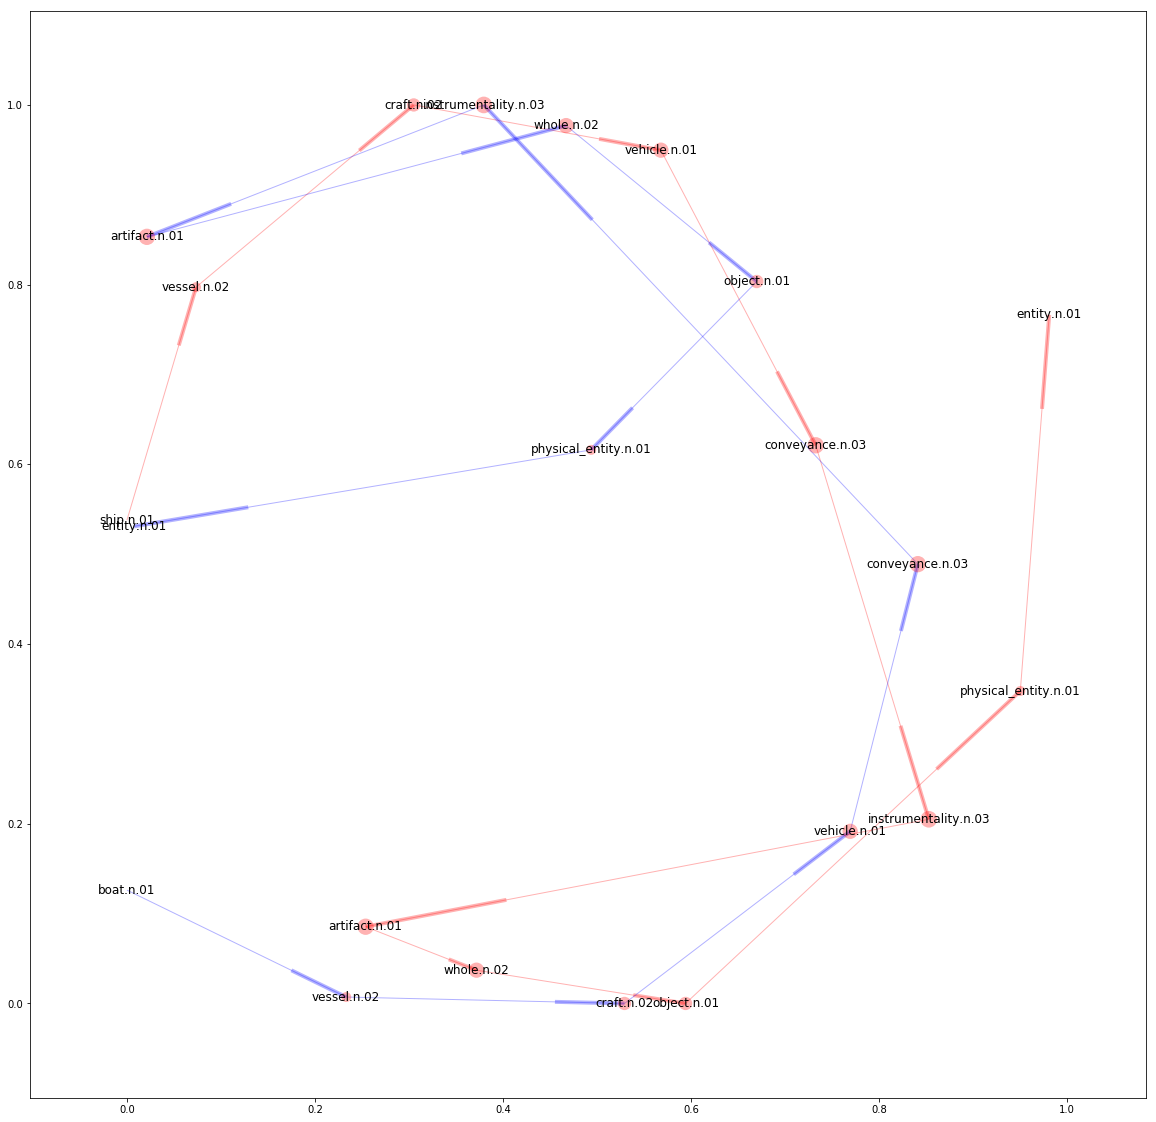

In [134]:
word = wordnet.synsets('ship')[0]
word2 = wordnet.synsets('boat')[0]

def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name())
            for s1 in fn(s):
                graph.add_node(s1.name())
                graph.add_edge(s.name(), s1.name())
                recurse(s1)
    recurse(synset)
    return graph

G = closure_graph(word, lambda s: s.hypernyms())
G2 = closure_graph(word2, lambda s: s.hypernyms())

index = nx.betweenness_centrality(G)
index2 = nx.betweenness_centrality(G2)

plt.rc('figure', figsize=(20, 20))

node_size = [index[n]*1000 for n in G]
node_size2 = [index2[n]*1000 for n in G2]

pos = nx.spring_layout(G)
pos2 = nx.spring_layout(G2)

nx.draw_networkx(G, pos, node_size=node_size, edge_color='r', alpha=.3, linewidths=0)
nx.draw_networkx(G2, pos2, node_size=node_size, edge_color='b', alpha=.3, linewidths=0)

plt.show()